In [124]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as mp
%matplotlib inline

In [125]:
df = pd.read_csv('~/Desktop/googleflu 1.csv')
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Salt Lake City, UT","Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI"
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,261,1066,948,NaN,1035,NaN,668,NaN,622,452
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,249,1249,963,NaN,1135,NaN,787,NaN,626,449
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,295,1289,970,NaN,1170,NaN,994,NaN,661,437
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,292,1308,1011,NaN,1342,NaN,999,NaN,649,487
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,328,1426,1009,NaN,1354,NaN,1297,NaN,657,499


In [126]:
df['ds']=pd.to_datetime(df['Date'])
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI",ds
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,1066,948,NaN,1035,NaN,668,NaN,622,452,2003-09-28
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,1249,963,NaN,1135,NaN,787,NaN,626,449,2003-10-05
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,1289,970,NaN,1170,NaN,994,NaN,661,437,2003-10-12
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,1308,1011,NaN,1342,NaN,999,NaN,649,487,2003-10-19
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,1426,1009,NaN,1354,NaN,1297,NaN,657,499,2003-10-26


In [127]:
df_flu = df[['ds', 'United States']]
df_flu.head()

,ds,United States
0,2003-09-28,902
1,2003-10-05,952
2,2003-10-12,1092
3,2003-10-19,1209
4,2003-10-26,1249


In [128]:
df2 = pd.read_csv('~/Desktop/States_ILI.csv')
df2['ds']=pd.to_datetime(df2['Week'])
df2.head()

,week.code,Week,AK,AL,AR,AZ,DE,GA,ID,KS,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,ds
0,200940,10/4/2009,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,...,6.481481,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303,2009-10-04
1,200941,10/11/2009,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,...,10.096154,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555,2009-10-11
2,200942,10/18/2009,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,...,8.770161,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631,2009-10-18
3,200943,10/25/2009,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,...,5.100830,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013,2009-10-25
4,200944,11/1/2009,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,...,2.837838,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838,2009-11-01


In [129]:
df2['US'] = df2['AK']+df2['AL']+df2['AR']+df2['AZ']+df2['DE']+df2['GA']+df2['ID']+df2['KS']+df2['KY']+df2['LA']+df2['MA']+df2['MD']+df2['ME']+df2['MI']+df2['MN']+df2['NC']+df2['ND']+df2['NE']+df2['NH']+df2['NJ']+df2['NM']+df2['NV']+df2['NY']+df2['OH']+df2['OR']+df2['PA']+df2['RI']+df2['SC']+df2['SD']+df2['TN']+df2['TX']+df2['UT']+df2['VA']+df2['VT']+df2['WA']+df2['WI']+df2['WV']                                                                                                                   
df2.head()

,week.code,Week,AK,AL,AR,AZ,DE,GA,ID,KS,...,TN,TX,UT,VA,VT,WA,WI,WV,ds,US
0,200940,10/4/2009,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,...,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303,2009-10-04,221.572984
1,200941,10/11/2009,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,...,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555,2009-10-11,271.136826
2,200942,10/18/2009,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,...,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631,2009-10-18,294.532493
3,200943,10/25/2009,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,...,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013,2009-10-25,282.747261
4,200944,11/1/2009,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,...,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838,2009-11-01,242.148545


In [130]:
df_ILI = df2[['ds', 'US']]
df_ILI.head()

,ds,US
0,2009-10-04,221.572984
1,2009-10-11,271.136826
2,2009-10-18,294.532493
3,2009-10-25,282.747261
4,2009-11-01,242.148545


In [131]:
df_sum=pd.merge(df_flu,df_ILI,on='ds',how='inner')
df_sum.head()

,ds,United States,US
0,2009-10-04,5424,221.572984
1,2009-10-11,6037,271.136826
2,2009-10-18,7112,294.532493
3,2009-10-25,6533,282.747261
4,2009-11-01,5722,242.148545


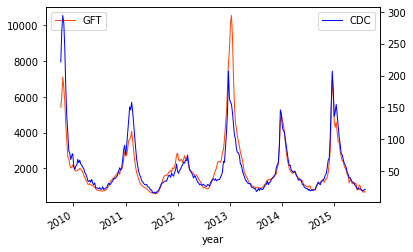

In [135]:
x = df_sum['ds']
y1= df_sum['United States']
y2= df_sum['US']

fig, ax1 = plt.subplots()
ax1.plot(x, y1, c='orangered',label='GFT', linewidth = 1) 
mp.legend(loc=2)
ax2 = ax1.twinx() 
ax2.plot(x, y2, c='blue',label='CDC', linewidth = 1) 
mp.legend(loc=1)

ax1.set_xlabel('year')
mp.gcf().autofmt_xdate()

mp.legend()
plt.show()

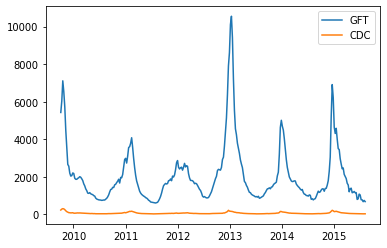

In [133]:
 ax1.plot(x, y1,'-', c='orangered',label='GFT', linewidth = 1) #绘制折线图像1,圆形点，标签，线宽
ax2.plot(x, y2, '-', c='blue',label='CDC', linewidth = 1) #同上

plt.plot(x, y1, label='GFT')
plt.plot(x, y2, label='CDC')
plt.legend()
plt.show()

ax2 = ax1.twinx() 
ax2.plot(x, y2, c='blue',label='CDC', linewidth = 1) 

NameError: name 'p3' is not defined

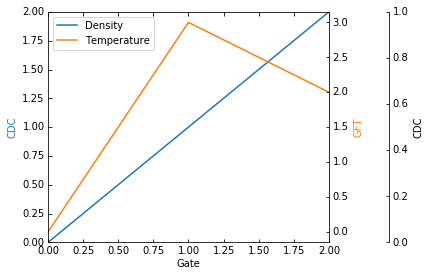

In [134]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(1)

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.set_ylabel('GFT')
host.set_xlabel('Date')

host.axis['right'].set_visible(False)
par1.axis['right'].set_visible(True)
par1.set_ylabel('GFT')

par1.axis['right'].major_ticklabels.set_visible(True)
par1.axis['right'].label.set_visible(True)

par2.set_ylabel('CDC')
offset = (60, 0)
new_axisline = par2._grid_helper.new_fixed_axis  # "_grid_helper"与"get_grid_helper()"等价，可以代替

#new_axisline = par2.get_grid_helper().new_fixed_axis  # 用"get_grid_helper()"代替，结果一样，区别目前不清楚
par2.axis['right2'] = new_axisline(loc='right', axes=par2, offset=offset)

fig.add_axes(host)

host.set_xlim(0,2)
host.set_ylim(0,2)

host.set_xlabel('Gate')
host.set_ylabel('GFT')
host.set_ylabel('CDC')

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")


host.legend()
#轴名称，刻度值的颜色
host.axis['left'].label.set_color(p1.get_color())
par1.axis['right'].label.set_color(p2.get_color())
par2.axis['right2'].label.set_color(p3.get_color())
par2.axis['right2'].major_ticklabels.set_color(p3.get_color()) #刻度值颜色
par2.axis['right2'].set_axisline_style('-|>',size=1.5) #轴的形状色
par2.axis['right2'].line.set_color(p3.get_color()) #轴的颜色